<h1>DATA 6550 Visualizations Project</h1>
<h3>By Abby Roberts</h3>

<h2>Import Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Import Data</h2>

In [2]:
filepath = '../../Data/train.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>Update for Readability</h2>

In [3]:
df['SurvivedBool'] = df['Survived']
df['Survived'] = df['Survived'].map({0:'Died', 1:'Survived'})
df['Sex'] = df['Sex'].str.title()
df['SexBool'] = df['Sex'] == 'Male'
df['Embarked from Port'] = df['Embarked'].map({'C': 'Cherbourg', 'S': 'Southampton', 'Q': 'Queenstown'})
df['Ticket Class'] = df['Pclass'].map({1: 'First Class', 2: 'Second Class', 3: 'Third Class'})
df.sort_values(by=['Pclass', 'SexBool'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedBool,SexBool,Embarked from Port,Ticket Class
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,Cherbourg,First Class
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S,1,False,Southampton,First Class
11,12,Survived,1,"Bonnell, Miss. Elizabeth",Female,58.0,0,0,113783,26.5500,C103,S,1,False,Southampton,First Class
31,32,Survived,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",Female,NaN,1,0,PC 17569,146.5208,B78,C,1,False,Cherbourg,First Class
52,53,Survived,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",Female,49.0,1,0,PC 17572,76.7292,D33,C,1,False,Cherbourg,First Class


<h2>Survival Rates of Men vs Women</h2>

<h3>Bad Plot</h3>

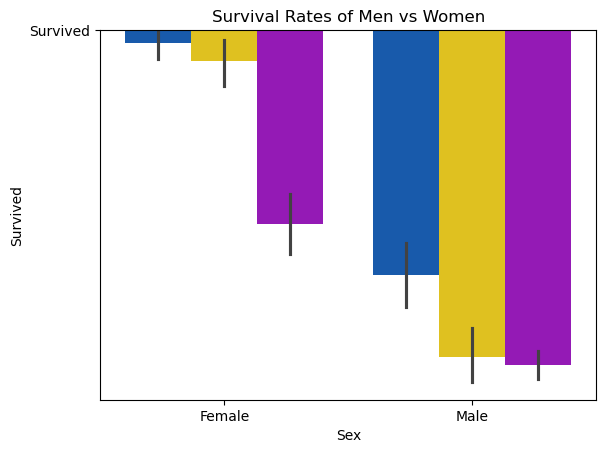

In [4]:
badplot1 = sns.barplot(df, x='Sex', y='Survived', hue='Ticket Class', palette='prism')
plt.title('Survival Rates of Men vs Women')
badplot1.legend_.remove()

<h3>Good Plot</h3>

Text(0.5, 1.0, 'Count of Passengers by Sex and Survival Status')

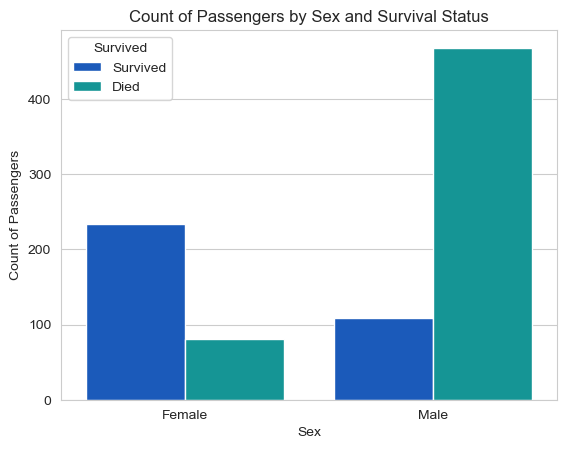

In [5]:
sns.set_style("whitegrid")
g = sns.countplot(data=df, x="Sex", hue="Survived", palette='winter')
g.set_ylabel('Count of Passengers')
g.set_title('Count of Passengers by Sex and Survival Status')

<h2>Survival Rates by Age</h2>

<h3>Bad Plot</h3>

Text(0.5, 1.0, 'Survival Rates by Age')

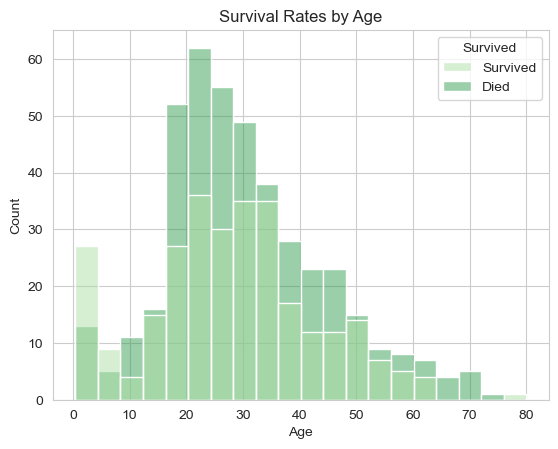

In [6]:
sns.histplot(df, x='Age', hue='Survived', palette='Greens')
plt.title('Survival Rates by Age')

<h3>Good plot</h3>

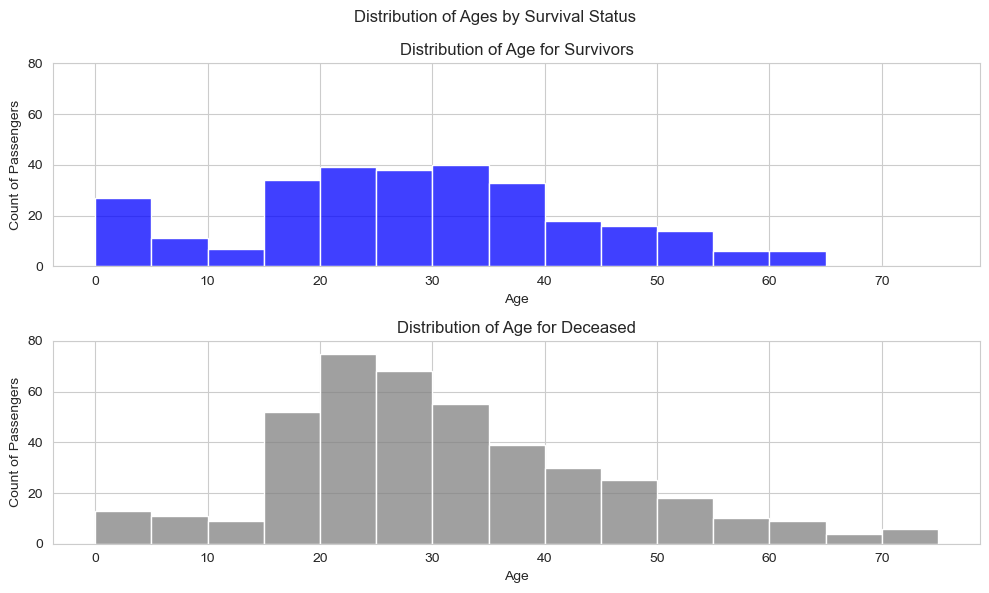

In [7]:
fig, axs = plt.subplots(2, figsize=(10,6))

histbins = range(0,80,5)

# survived
axs[0].set_title('Distribution of Age for Survivors')
sns.histplot(df[df['Survived']=='Survived'], x='Age', ax=axs[0], bins=histbins, color='blue')
axs[0].set_ylim(0,80)
axs[0].set_ylabel('Count of Passengers')

# died
axs[1].set_title('Distribution of Age for Deceased')
sns.histplot(df[df['Survived']!='Survived'], x='Age', ax=axs[1], bins=histbins, color='grey')
axs[1].set_ylim(0,80)
axs[1].set_ylabel('Count of Passengers')

plt.suptitle('Distribution of Ages by Survival Status')
plt.tight_layout()